# Sentiment Classification with Keras

We explore some approaches to sentiment classification of IMDB data, following examples by keras-team:

https://github.com/keras-team/keras/blob/master/examples/README.md

About the data, from keras.io documentation: *Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".*

## LSTM
https://en.wikipedia.org/wiki/Long_short-term_memory

Following: https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

Let's import some packages first:

In [1]:
# basic
import numpy as np

# keras
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

# plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


Next, initialize some hyperparameters:

In [2]:
max_features = 20000 # cut texts after this number of words

maxlen = 80 # maximum length of feature sequences

batch_size = 32 # per-epoch size of training sample

We use the load_data method from Keras imdb, which conveniently can take max_features as argument, and yields pairs (X,y) of train and test data: 

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


Next, padding, to obtain feature sequences of the same length (maxlen above):

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


Finally, let's define the model:

In [5]:
model = Sequential() # initialize sequential model
model.add(Embedding(max_features, 128)) # embedding layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # lstm layer
model.add(Dense(1, activation='sigmoid')) # classification

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Compile it:

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


Train it:

In [7]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 276s 11ms/step - loss: 0.4615 - acc: 0.7821 - val_loss: 0.3994 - val_acc: 0.8218
Epoch 2/5
25000/25000 [==============================] - 263s 11ms/step - loss: 0.3001 - acc: 0.8772 - val_loss: 0.4076 - val_acc: 0.8174
Epoch 3/5
25000/25000 [==============================] - 267s 11ms/step - loss: 0.2208 - acc: 0.9143 - val_loss: 0.4040 - val_acc: 0.8262
Epoch 4/5
25000/25000 [==============================] - 247s 10ms/step - loss: 0.1591 - acc: 0.9394 - val_loss: 0.4518 - val_acc: 0.8281
Epoch 5/5
25000/25000 [==============================] - 245s 10ms/step - loss: 0.1140 - acc: 0.9574 - val_loss: 0.5786 - val_acc: 0.8246


We can evaluate the model as follows:

In [8]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9800
Testing Accuracy:  0.8246


It's also useful to take a look at the training history.

We define a function which takes a training history (fitted model) as input and plots accuracy and loss through epochs on training and validation set:

In [9]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Display the history:

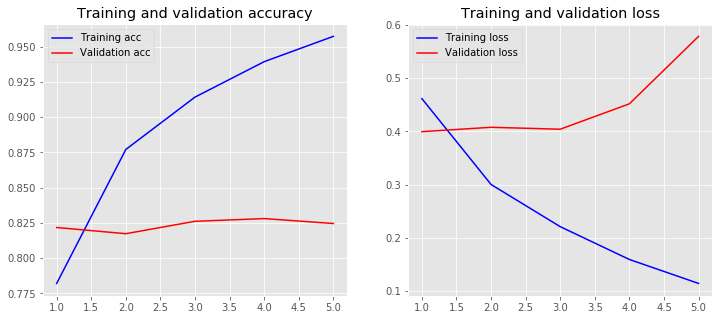

In [10]:
plot_history(history)

Accuracy on validation is set is not bad, but the model appears to be overfitting training data.

## Bidirectional LSTM
https://en.wikipedia.org/wiki/Bidirectional_recurrent_neural_networks

Following https://github.com/keras-team/keras/blob/master/examples/imdb_bidirectional_lstm.py

Add package:

In [11]:
from keras.layers import Bidirectional, Dropout

Next, we initialize some hyperparameters:

In [12]:
max_features = 15000 # cut texts after this number of words
maxlen = 50 # maximum length of feature sequences
batch_size = 15 # per-epoch size of training sample

Pre-processing:

In [13]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


Padding:

In [14]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = np.array(y_train) # convert to numpy array
y_test = np.array(y_test)

x_train shape: (25000, 50)
x_test shape: (25000, 50)


Finally, we define the model:

In [15]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen)) # embedding layer
model.add(Bidirectional(LSTM(64))) # bidirectional lstm layer
model.add(Dropout(0.5)) # droput
model.add(Dense(1, activation='sigmoid')) # classification

Compile, then fit:

In [16]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 128)           1920000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,018,945
Trainable params: 2,018,945
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=[x_test, y_test])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 283s 11ms/step - loss: 0.4523 - acc: 0.7816 - val_loss: 0.3954 - val_acc: 0.8229
Epoch 2/5
25000/25000 [==============================] - 276s 11ms/step - loss: 0.2838 - acc: 0.8821 - val_loss: 0.4290 - val_acc: 0.8216
Epoch 3/5
25000/25000 [==============================] - 278s 11ms/step - loss: 0.1648 - acc: 0.9380 - val_loss: 0.4981 - val_acc: 0.8074
Epoch 4/5
25000/25000 [==============================] - 274s 11ms/step - loss: 0.0824 - acc: 0.9700 - val_loss: 0.6837 - val_acc: 0.7926
Epoch 5/5
25000/25000 [==============================] - 276s 11ms/step - loss: 0.0446 - acc: 0.9848 - val_loss: 0.8804 - val_acc: 0.7847


Evaluate model:

In [18]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9858
Testing Accuracy:  0.7847


Cool. Let's display history of training using the function defined above:

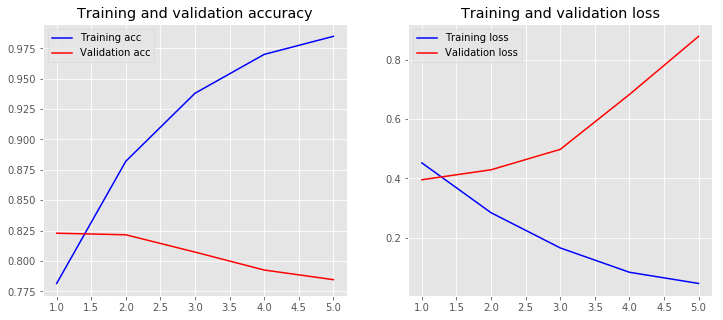

In [19]:
# apply to history
plot_history(history)

Again the model is clearly overfitting training data.

## Convolution1D
https://en.wikipedia.org/wiki/Convolutional_neural_network#Natural_language_processing

Following https://github.com/keras-team/keras/blob/master/examples/imdb_cnn.py

In [20]:
# more keras stuff
from keras.layers import Conv1D, GlobalMaxPooling1D, Activation

Initialize some hyperparameters:

In [21]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250

Pre-process data based on the new hyperparameters:

In [22]:
# split
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# padding
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
x_train shape: (25000, 400)
x_test shape: (25000, 400)


Next, define model:

In [23]:
model = Sequential()

model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen)) # embedding layer

model.add(Dropout(0.2)) # dropout

model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1)) # convolutional layer learns filters

model.add(GlobalMaxPooling1D()) # max pooling

model.add(Dense(hidden_dims)) # dense hidden layer
model.add(Dropout(0.2)) # more dropout
model.add(Activation('relu')) # activation

# finally project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

Compile:

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

Training:

In [25]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 146s 6ms/step - loss: 0.4057 - acc: 0.7998 - val_loss: 0.3244 - val_acc: 0.8595
Epoch 2/5
25000/25000 [==============================] - 146s 6ms/step - loss: 0.2320 - acc: 0.9063 - val_loss: 0.3045 - val_acc: 0.8738
Epoch 3/5
25000/25000 [==============================] - 146s 6ms/step - loss: 0.1654 - acc: 0.9374 - val_loss: 0.2685 - val_acc: 0.8923
Epoch 4/5
25000/25000 [==============================] - 145s 6ms/step - loss: 0.1145 - acc: 0.9576 - val_loss: 0.3063 - val_acc: 0.8872
Epoch 5/5
25000/25000 [==============================] - 146s 6ms/step - loss: 0.0775 - acc: 0.9718 - val_loss: 0.3617 - val_acc: 0.8846


Evaluate model and make plots:

Training Accuracy: 0.9944
Testing Accuracy:  0.8846


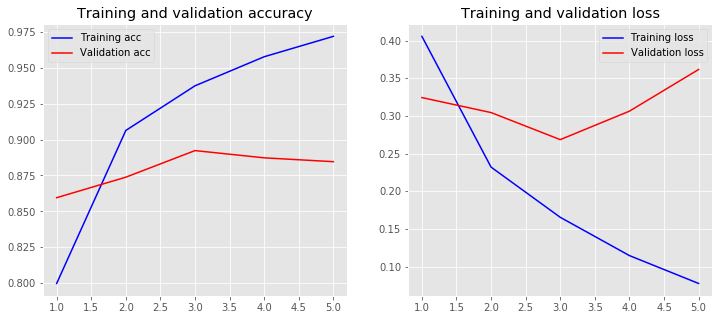

In [26]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

We can observe peak accuracy and lowest loss on validation at third epoch. Then, overfitting happens.

## Stacking Convolution1d and LSTM
Following https://github.com/keras-team/keras/blob/master/examples/imdb_cnn_lstm.py

In [27]:
# package
from keras.layers import MaxPooling1D

In [28]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 5

In [29]:
# pre-processing
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [30]:
# model
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [31]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 71        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total para

In [32]:
# train
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.3862 - acc: 0.8200 - val_loss: 0.3432 - val_acc: 0.8480
Epoch 2/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.1984 - acc: 0.9253 - val_loss: 0.3454 - val_acc: 0.8577
Epoch 3/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.0936 - acc: 0.9685 - val_loss: 0.4173 - val_acc: 0.8407
Epoch 4/5
25000/25000 [==============================] - 100s 4ms/step - loss: 0.0439 - acc: 0.9854 - val_loss: 0.5679 - val_acc: 0.8420
Epoch 5/5
25000/25000 [==============================] - 102s 4ms/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.6837 - val_acc: 0.8341


Training Accuracy: 0.9966
Testing Accuracy:  0.8341


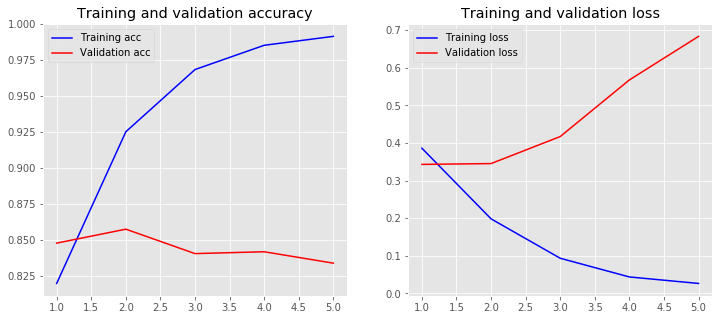

In [33]:
# evaluation and plot
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

Better results are achieved with fastText with Keras (see notebook).